<h1>Finding the eating/drinking venues for the Tourists visiting the “City of lakes” Udaipur, Rajasthan, India</h1>
<h4>1.1 Introduction</h4>
<h4>1.2 Data Collection</h4> 
<h4>1.3 Data Cleaning</h4>
<h4>1.4 Methdology Adopted</h4>
<h4>1.5 Data Analysis</h4>
<h4>1.6 Results & Discussion</h4>
<h4>1.7 Conclusion</h4>

<h2>1.1 Introduction</h2>
<p>As Udaipur is a famous tourist place in the state of Rajasthan, the main objective of this project is to find 
the eating/drinking venues based on their average price as well as the rating attained by the them. The objective
of the project has been achieved with the help of two APIs: Foursquare and Zomato. This project shall help the tourists
in selecting the eating/drinking venues as per their budget and also the quality of service and food in terms of ratings.</p>

<h2>1.2 Data Collection</h2>
<p> <b>folium</b> library has been used to show the map of Udaipur. To collect the data of eating/drinking venues like name of the venue, 
rating, longitude, latitude, price, category etc. by using two APIs: Foursquare and Zomato. To fetch the data from the above said APIs,
the account has been created at www.foursquare.com and www.developers.zomato.com to get the credentials and user key respectively.</p> 

In [1]:
!pip install geocoder
!pip install folium
UD_LATITUDE = '24.5854'
UD_LONGITUDE = '73.7125'
print('The geograpical coordinates of Udaipur are {}, {}.'.format(UD_LATITUDE, UD_LONGITUDE))

     |████████████████████████████████| 102kB 2.7MB/s ta 0:00:01
     |████████████████████████████████| 102kB 1.7MB/s ta 0:00:01
The geograpical coordinates of Udaipur are 24.5854, 73.7125.


In [2]:
import folium
udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)
folium.Marker([UD_LATITUDE, UD_LONGITUDE]).add_to(udaipur_map)


<h4>Map of Udaipur</h4>

In [3]:
udaipur_map.save("Udaipur_Map.html")
udaipur_map

<h4> Using Forsquare API to fetch the data for the venues within a radius of 4KM and max. no. of venues to be searched is 100</h4>

In [4]:
FOURSQUARE_CLIENT_ID = 'D1KD2YCP2TYEG2430UKBE3JVJZXDCIXK5RYKXU2KAX53IWI5'
FOURSQUARE_CLIENT_SECRET = 'QTWCXAH0ISYHB33COQISGU5J1T03IHOVYYEG1RURZDBAZ5OZ'

In [5]:
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100
VERSION = '20200530'

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        UD_LATITUDE, 
                                                                        UD_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 58 venues fetched within a total radius of 4.0 Km

Total 58 venues fetched


<h4> Using Zomato API to fetch the data for the venues</h4>

In [8]:
headers = {'user-key': 'e16f574e4da4904705c3fc68cf5c6ec5'}

In [9]:
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])


Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

<h2>1.3 Data Cleaning</h2>
The data using Foursquare API and Zomato API has been fetched but we have to align the data and merge it into one dataframe.
We will plot the data points using Forsquare API where we have name, latitude and longitude of the venues and then we will plot the data points using zomato API where  plot the we have name, address, latitude and longitude of the venues.
We will then find out the different categories of venues and drop the mismatched venues. after this the data will be ready for the analysis. 
<h4>Plotting the Data points using Foursquare API</h4>

In [10]:
#Data Cleaning
udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(udaipur_map)  

udaipur_map.save("Forsquare_Map.html")
udaipur_map

<p> From the data points plotted above, we can find out that most of the eating/drinking venues are in the area of <b>Lake Pichola Lake</b>, near <b>City palace</b> and <b> Gangaur Ghat</b> areas.
    
<h4>Plotting the Data points using Zomato API</h4>

In [11]:
udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(udaipur_map)  

udaipur_map.save("Zomato.html")
udaipur_map

<p> From the data points plotted above, we can find out that most of the eating/drinking venues are in the area of <b>Lake Pichola Lake</b>, near <b>City palace</b> and <b> Gangaur Ghat</b> areas.
    
<h4>Plotting the Data points using Zomato API</h4>
<h4>Combining the two datasets from Foursquare & Zomato to remove the duplicate data</h4>

In [12]:
#Combining the two datasets from Foursquare & Zomato to remove the duplicate data
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [13]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [14]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Lalit Laxmi Vilas Palace Hotel,Hotel,24.5938,73.6824,Padmini - The LaLiT Laxmi Vilas Palace,24.5939,73.6826,3000.0,4.0,3.7,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",0.0001,0.0002
1,Sankalp,Indian Restaurant,24.5773,73.6992,Sankalp,24.5775,73.6993,600.0,2.0,3.9,"Mewar Motor Building, 48, Toran Bawadi, City S...",0.0002,0.0001
2,Natraj Dining,Indian Restaurant,24.5724,73.6997,Natraj Dining Hall & Restaurant,24.5724,73.6996,400.0,1.0,4.5,"22-24, City Station Road, City Centre, Udaipur",0.0000,-0.0001
3,Jaiwana Haveli,Hotel,24.5792,73.6826,Jaiwana Haveli Rooftop Restaurant,24.5792,73.6825,1000.0,3.0,4.2,"14, Lalghat, Chandpole, Udaipur",0.0000,-0.0001
4,Brewmen Café,Café,24.6014,73.6871,Royal Brewmen,24.6014,73.6872,400.0,1.0,4.0,"Shop 4, Hitawala Complex 2, Saheli Marg, Panch...",0.0000,0.0001
5,Panorama,Hotel,24.5804,73.6798,Panorama Rooftop Restaurant,24.5803,73.6798,800.0,2.0,3.1,"Panorama Guest House, Hanuman Ghat, Outside Ch...",-0.0001,0.0000
6,Cafe Namaste,Dessert Shop,24.5804,73.6825,1o9 Cafe,24.5805,73.6826,500.0,2.0,4.1,"64, Gangaur Ghat, Jagdish Square, Opposite Gan...",0.0001,0.0001
7,Bagore ki Haveli,History Museum,24.5795,73.6823,Mewar Haveli Rooftop Restaurant,24.5796,73.6827,550.0,2.0,3.7,"34-35, Lal Ghat, Chandpole, Udaipur",0.0001,0.0004
8,Platterzz,Restaurant,24.5925,73.6977,Platterzz,24.5924,73.6977,1000.0,3.0,4.3,"5,Bhatt Ji Ki Bari, Residency Road, Near GBH A...",-0.0001,0.0000
9,Sukhadia Circle,Monument / Landmark,24.6004,73.6910,Gaurav Ice Cream&Milk Parlour,24.6004,73.6910,200.0,1.0,3.9,"Bombay Market, Sukhadiya Circle, Panchwati, Ud...",0.0000,0.0000


<h4>As per the observation made after merging the data sets from Foursquare API and Zomato API.</h4>
the data sets can be divided into the following categories:

<b>Category 1:</b> There are venues like Malls that have specific restaurants/cafes inside them as observed from 
            Zomato API (WTF-Wrap The Fun in Lake City Mall).
            
<b>Category 2:</b> There are some venues with changed names(Natural View  changed to Natural View Restaurant) 

<b>Category 3:</b> The logitude and latitude values for two locations are same but they are not matching (Bagore ki Haveli  
            which is a History Museum and Mewar Haveli Rooftop Restaurant).

The venues that belong to Category 1 and Category 2 are to kept for further processing whereas the venues that belong to the Category 3
will be removed from the data set.

In [15]:
selected_venues = selected_venues.drop([7]).reset_index(drop = True)

<p>The average price of the venue is caculated and after keeping the columns of category, venue, latitude, longitude, price_range, 
rating, address and average_price rest of the columns have been dropped and the sample of the dataset is shown below:</p>

In [16]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [17]:
selected_venues

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Padmini - The LaLiT Laxmi Vilas Palace,24.5939,73.6826,4.0,3.7,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",1500.0
1,Indian Restaurant,Sankalp,24.5775,73.6993,2.0,3.9,"Mewar Motor Building, 48, Toran Bawadi, City S...",300.0
2,Indian Restaurant,Natraj Dining Hall & Restaurant,24.5724,73.6996,1.0,4.5,"22-24, City Station Road, City Centre, Udaipur",200.0
3,Hotel,Jaiwana Haveli Rooftop Restaurant,24.5792,73.6825,3.0,4.2,"14, Lalghat, Chandpole, Udaipur",500.0
4,Café,Royal Brewmen,24.6014,73.6872,1.0,4.0,"Shop 4, Hitawala Complex 2, Saheli Marg, Panch...",200.0
5,Hotel,Panorama Rooftop Restaurant,24.5803,73.6798,2.0,3.1,"Panorama Guest House, Hanuman Ghat, Outside Ch...",400.0
6,Dessert Shop,1o9 Cafe,24.5805,73.6826,2.0,4.1,"64, Gangaur Ghat, Jagdish Square, Opposite Gan...",250.0
7,Restaurant,Platterzz,24.5924,73.6977,3.0,4.3,"5,Bhatt Ji Ki Bari, Residency Road, Near GBH A...",500.0
8,Monument / Landmark,Gaurav Ice Cream&Milk Parlour,24.6004,73.6910,1.0,3.9,"Bombay Market, Sukhadiya Circle, Panchwati, Ud...",100.0
9,Roof Deck,TMP Rooftop Restaurant,24.5797,73.6801,3.0,3.3,"Hotel Mandiram Palace, 71 - Panchdevri, Hanuma...",500.0


In [18]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 23


<h2>1.4 Methodology Adopted</h2>
The main objective of this project is to find the eating/drinking venues based on their average price as well as the rating attained
by the them in the city of lakes, Udaipur. So that it can fit to the budget of the tourists as well as they get best taste of Udaipur.

<B>Step 1. Data Collection</b>
Data about the venues from the heart of Udaipur is fetched from Forsquare API and Zomato API 

<B>Step 2. Data Cleaning</b>
Data is cleaned by dropping the irrelevent or mismatched venues. and categories of different types have been defined. For this, first data
from two APIs have been merged by keeing the name, latitude and longitude of the venues along with Category, price, rating and average_price and mismatched category type data is dropped.

<B>Step 3. Data Analysis</b>
In this step, eating/drinking venues will be analysed on the basis of ratings as well as average price per person. This analysis will give 
an idea to customer about which venue will fit to his/her budget and which venue will give him/her the real taste of udaipur or both. It will also help the tourists to choose the venues amongst all the good ones as well as close to his/her location.

<B>Step 4. Results & Discussion</b>
In this step, all the results obtained after analysis are represented graphically and discussed.

<B> Step 5. Conclusion</B>
A conclusion can be drawn on the basis of the requirement of the Tourists

<h2>1.5 Data Analysis</h2>
<h4>1.5.1 Analysis on the basis of Category</h4>
The bar graph below shows the number of venues in each category.
It can be observed from the bar graph that We have maximum number of Hotels and Cafes as compare to other categories of eating/drinking venues

<BarContainer object of 13 artists>

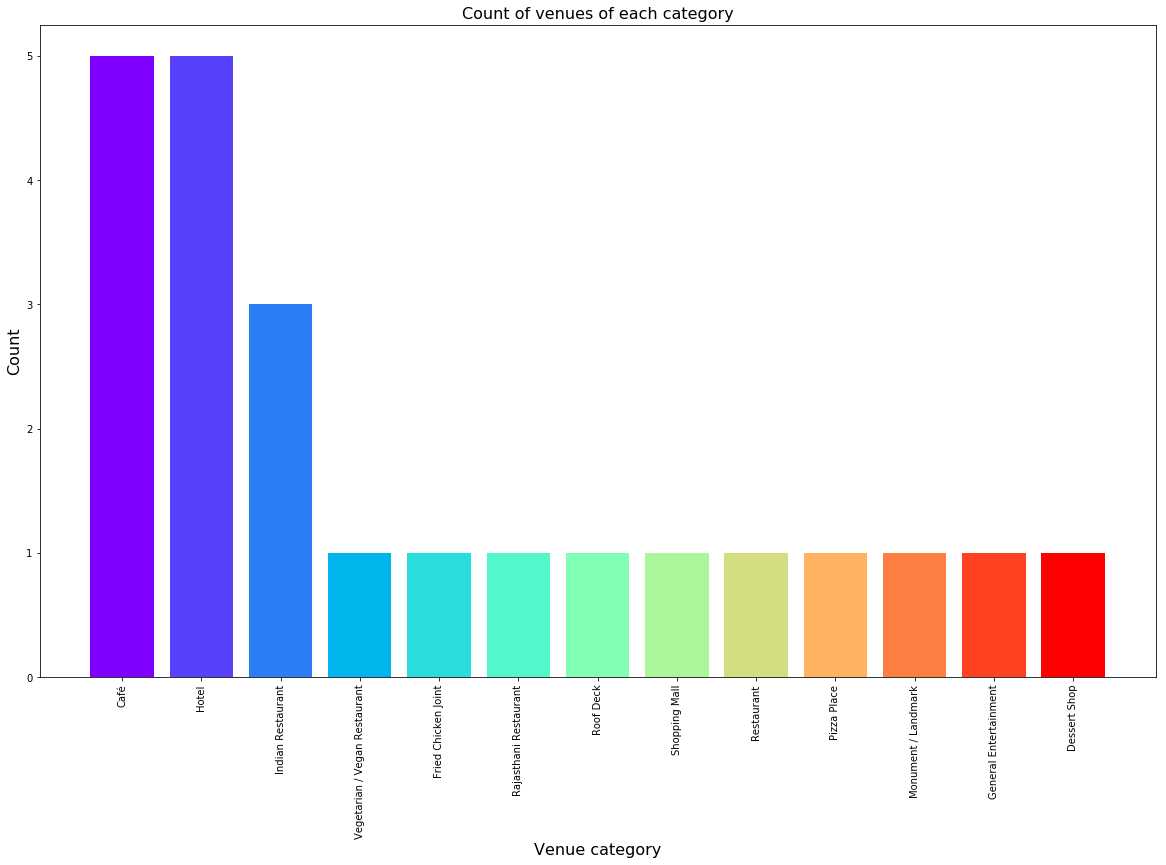

In [19]:
#Analysis: Categories
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

<h4>1.5.2 Analysis on the basis of Rating of Venues </h4>
The bar graph has been plotted and it has been observed that there are more than 50% venues that have ratings greater than 3.5 at the 
scale of 5.0 

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Count of venues with given rating')

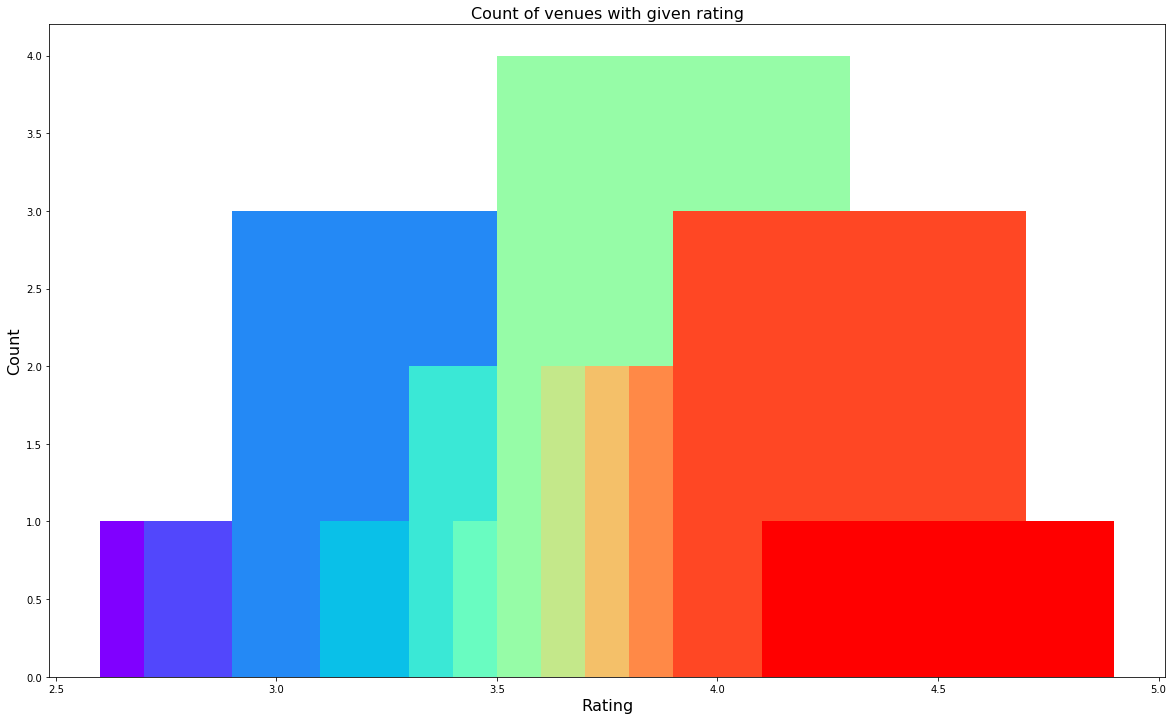

In [20]:
#Ratings
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

<h4>1.5.3 Analysis on the basis of dividing the venues on the basis of ratings into Low, Okay, Good and very good categories</h4>

Low: 1-2(RED)

Okay: 2-3(ORANGE)

Good: 3-4(GREEN)

Very Good: 4-5(DARKGREEN)

These categories are shown with the map below with different colors. It has been observed that maximum good venues are near the Gangaur Ghat, City Palace, Fateh Sagar Pal and Pachvati areas.

In [21]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(udaipur_map)  

udaipur_map.save("Venues Ratings.html")
udaipur_map

<h4>1.5.4 Analysis on the basis of Average Price per Person</h4>
The analysis for the Average Price per Person has been shown below and it has been observed that the maximum number of venues have average 
price less than Rs. 1000.  

Text(0.5, 1.0, 'Count of venues with given average price')

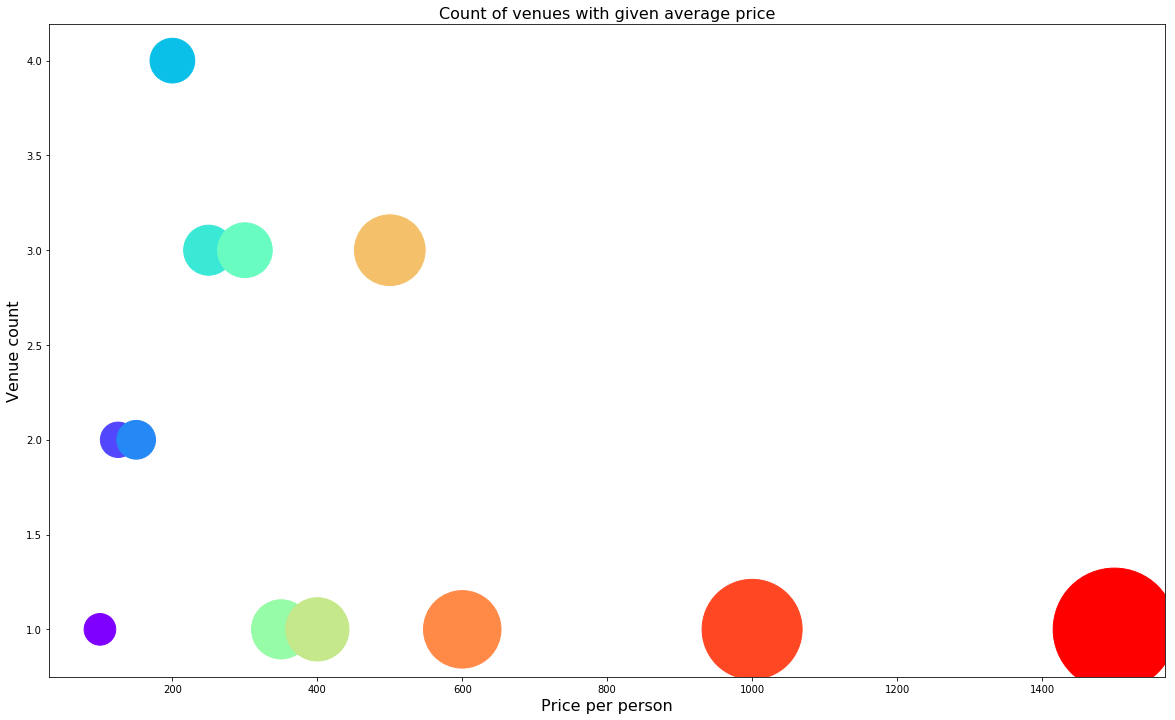

In [23]:
#segmentation on the basis of Price 
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

In [24]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(udaipur_map)  

udaipur_map.save("Venues Prices.html")
udaipur_map

<h4>1.5.5 Clustering using KMeans Approach</h4>
Clusters have been created using KMeans clustering algorithm on the basis of price range, location. Two clusters have been created.
It has been observed that maximum venues are low priced and rating and close to each other.

In [25]:
#Clustering
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Hotel,Padmini - The LaLiT Laxmi Vilas Palace,24.5939,73.6826,4.0,3.7,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",1500.0,Good
1,0,Indian Restaurant,Sankalp,24.5775,73.6993,2.0,3.9,"Mewar Motor Building, 48, Toran Bawadi, City S...",300.0,Good
2,0,Indian Restaurant,Natraj Dining Hall & Restaurant,24.5724,73.6996,1.0,4.5,"22-24, City Station Road, City Centre, Udaipur",200.0,Very good
3,0,Hotel,Jaiwana Haveli Rooftop Restaurant,24.5792,73.6825,3.0,4.2,"14, Lalghat, Chandpole, Udaipur",500.0,Very good
4,0,Café,Royal Brewmen,24.6014,73.6872,1.0,4.0,"Shop 4, Hitawala Complex 2, Saheli Marg, Panch...",200.0,Good


In [26]:
udaipur_map = folium.Map(location = [UD_LATITUDE, UD_LONGITUDE], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(udaipur_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(udaipur_map)

udaipur_map.save("Venues Clusters.html")
udaipur_map

In [27]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Indian Restaurant,Sankalp,24.5775,73.6993,2.0,3.9,"Mewar Motor Building, 48, Toran Bawadi, City S...",300.0,Good
1,0,Indian Restaurant,Natraj Dining Hall & Restaurant,24.5724,73.6996,1.0,4.5,"22-24, City Station Road, City Centre, Udaipur",200.0,Very good
2,0,Hotel,Jaiwana Haveli Rooftop Restaurant,24.5792,73.6825,3.0,4.2,"14, Lalghat, Chandpole, Udaipur",500.0,Very good
3,0,Café,Royal Brewmen,24.6014,73.6872,1.0,4.0,"Shop 4, Hitawala Complex 2, Saheli Marg, Panch...",200.0,Good
4,0,Hotel,Panorama Rooftop Restaurant,24.5803,73.6798,2.0,3.1,"Panorama Guest House, Hanuman Ghat, Outside Ch...",400.0,Good
5,0,Dessert Shop,1o9 Cafe,24.5805,73.6826,2.0,4.1,"64, Gangaur Ghat, Jagdish Square, Opposite Gan...",250.0,Very good
6,0,Restaurant,Platterzz,24.5924,73.6977,3.0,4.3,"5,Bhatt Ji Ki Bari, Residency Road, Near GBH A...",500.0,Very good
7,0,Monument / Landmark,Gaurav Ice Cream&Milk Parlour,24.6004,73.6910,1.0,3.9,"Bombay Market, Sukhadiya Circle, Panchwati, Ud...",100.0,Good
8,0,Roof Deck,TMP Rooftop Restaurant,24.5797,73.6801,3.0,3.3,"Hotel Mandiram Palace, 71 - Panchdevri, Hanuma...",500.0,Good
9,0,Vegetarian / Vegan Restaurant,Millets of Mewar,24.5811,73.6802,2.0,3.9,"16, Bhim Parmeshwar Marg, Hanuman Ghat, Outsid...",300.0,Good


In [28]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 1.76 and rating spread around 3.86


In [29]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Hotel,Padmini - The LaLiT Laxmi Vilas Palace,24.5939,73.6826,4.0,3.7,"The Lalit Laxmi Vilas Palace, Opposite Fateh S...",1500.0,Good
1,1,Hotel,Bougainvillea Terrace By The Lake,24.5916,73.6764,4.0,3.5,"Hotel Lakend, Fateh Sagar Lake Shore, Alkapuri...",1000.0,Good


In [30]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 4.00 and rating spread around 3.60


<h2>1.6 Results and Discussion</h2> 

On the basis of the analysis done in section 1.5 a number of conclusions can been drawn which can be useful to the tourists who wants to visit
the City of Lakes, Udaipur. The data was collected from Foursquare API and Zomato API, within a radius of 4KM, total 54 venues were fetched 
but some venues were diferent in both the APIs. After analysing the latitude and longitude data of these venues and removing the mismatched 
ones. we were left with 21 different venues. 
The ratings of these 21 venues are between 1.0 to 5.0. and majority of the venues are having
rating greater than 3.5. therefore, on the basis of rating, we can conclude that majority of the venues are of good quality in terms of
food, location etc.
After analysing the venues on the basis of their Average Price per person, It has been observed that out of all the venues only two venues 
are charging More than Rs. 1000 and rest of the venues are having their average price less than Rs. 1000. The minimum average price is Rs. 100
that is very reasobable.
After applying KMeans clustering, it has been observed that venues with less average price have a mean rating of 3.88 and average price 
range of 1.79 whereas the venues with higher price have mean price range of 4.00 and rating spread around 3.60.

It has been concludsed from the analysis that if the tourist wants a cheaper venue for eating/drinking he/she should go to Gangaur Ghat  and 
area that is behind Pichola Lake. If he/she is looking for best places with no restriction on budget should try near the Fateh Sagar Lake 
area. If the tourist does not have any restriction on budget as well as rating then   he/she should try the venues near city palace, gangaur 
ghat, lake Pichola and Fateh Sagar Lake.
An Android App can be developed for this.

<h2>1.7 Conclusion</h2> 
The objective of this project is to help the visitors to find the eating/drinking venues who are visiting Udaipur
The observations have been shown through maps and it is suggested to the tourists to visit Gangaur, Ghat, Cit Palace, Lake Pichola and Fateh 
Sagar Lake areas for eating/drinking and can find the venues as per their budget as well as ratings of the venues.